# 911 Calls Project

In this project we have taken a dataset '911' from kaggle for analyzing 911 call data.Consisting of following fields-
lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)

**Importing necessary python libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the csv file as a dataframe called df**

In [2]:
df=pd.read_csv('911.csv')

** Checking the info() and describe() of the df **

In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


**Checking the head of df**

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Performing various functions on df**

In [5]:
df['zip'].value_counts().head(5)  # top 5 zipcodes for 911 calls

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
df['twp'].value_counts().head(5) # top 5 townships (twp) for 911 calls

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
df['title'].nunique() #number of unique titles

110

In [8]:
df['reason']=df['title'].apply(lambda x : x.split(':')[0]) # creating a new column with name reason with values taken from the title column split at ":"
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


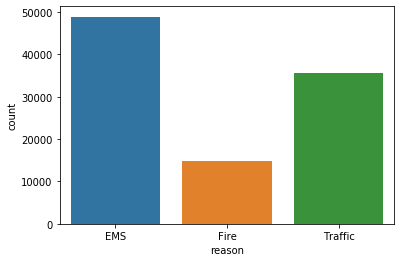

In [9]:
sns.countplot(x='reason',data=df) #countplot of 911 calls by Reason using seaborn

In [12]:
print(type('timeStamp'))
df['timeStamp'] = pd.to_datetime(df['timeStamp'])#converting column from strings to DateTime objects
df.head(5)

<class 'str'>


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [15]:
#creating new columns from timeStamp column
df['Hour']=df['timeStamp'].apply(lambda x : x.hour)
df['Month']=df['timeStamp'].apply(lambda x : x.month)
df['Day']=df['timeStamp'].apply(lambda x : x.dayofweek)

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} 


In [17]:
df['Day']=df['Day'].map(dmap) #mapping day column of integer values with string values 
df['Day']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day, Length: 99492, dtype: object

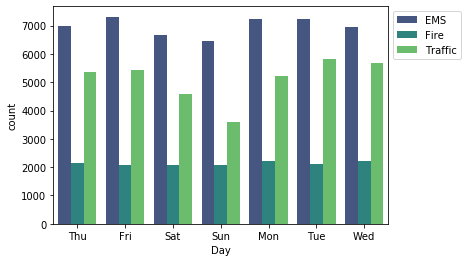

In [18]:
#countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot(x='Day',data=df,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1,1))  

In [19]:
#grouping the DataFrame by the month column and use the count() method for aggregation
p=df.groupby('Month').count()
p.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


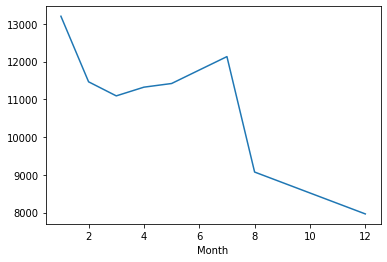

In [20]:
p['twp'].plot() # simple plot of the dataframe indicating the count of calls per month

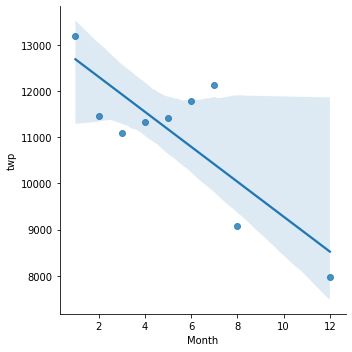

In [21]:
 #using lmplot to create a linear fit on the number of calls per month after reseting the index to column
sns.lmplot(x='Month',y='twp',data=p.reset_index()) 

In [22]:
#Create a new column called 'Date' that contains the date from the timeStamp column
df['date']=df['timeStamp'].apply(lambda x : x.date())
df['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

In [23]:
f=df.groupby('date').count() #groupby this Date column with the count() aggregate

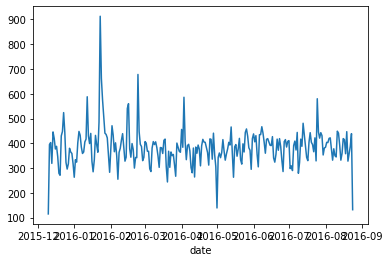

In [24]:
f['twp'].plot() #creating a plot of counts of 911 calls

In [25]:
#restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week
df1=df.groupby(['Day','Hour']).count()
df1=df1.pivot_table(values='reason',index='Day',columns='Hour')
df1.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


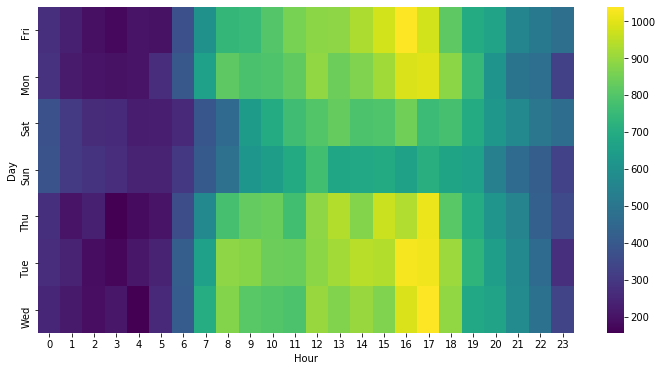

In [26]:
#creating a HeatMap using this new DataFrame
plt.figure(figsize=(12,6))
sns.heatmap(df1,cmap='viridis')

<Figure size 576x144 with 0 Axes>

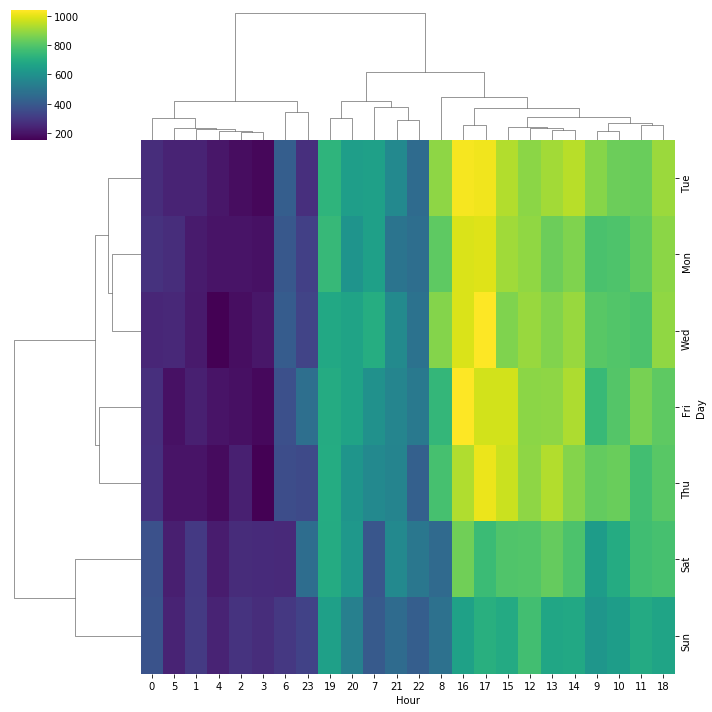

In [27]:
#create a clustermap using this new dataframe
plt.figure(figsize=(8,2))
sns.clustermap(df1,cmap='viridis')

In [28]:
# restructure the dataframe that shows the Month as the column
df2=df.groupby(['Day','Month']).count()
df2=df2.pivot_table(values='reason',index='Day',columns='Month')
df2.head()

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


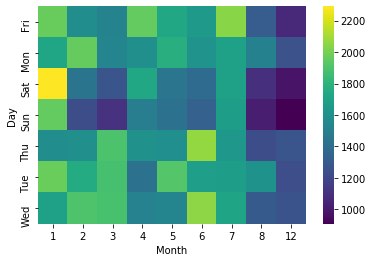

In [29]:
#creating a HeatMap using this new DataFrame
sns.heatmap(df2,cmap='viridis')

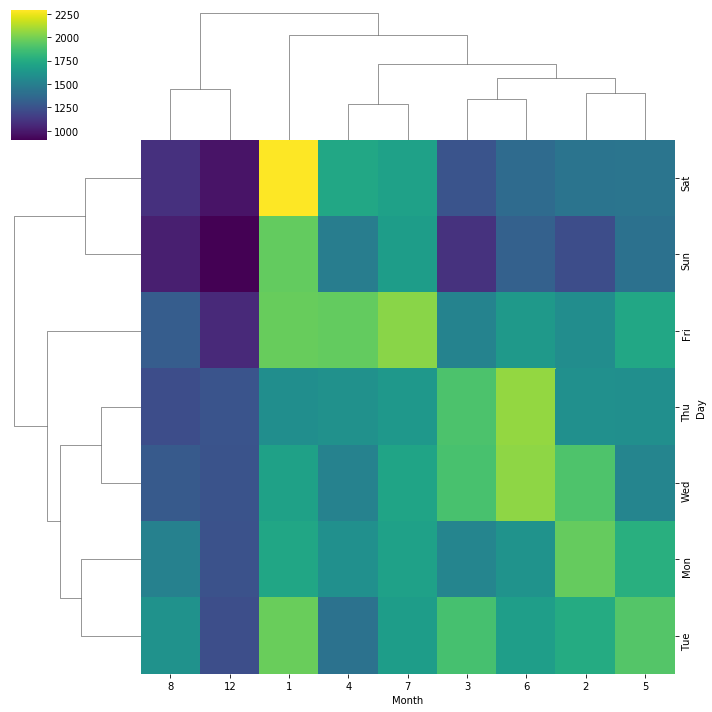

In [30]:
#create a clustermap using this new dataframe
sns.clustermap(df2,cmap='viridis')

# THE END